In [75]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [13]:
# Loading Data and working with Date Fields

BaseLocation= 'C:\Users\staml\Desktop\Data Science\Learn\Chart-Interpretation\\'

df = pd.read_csv(BaseLocation + 'SENVION_DATA.csv',low_memory=False)

DateColumn = 'TICKETSUBMITDATE'
df[DateColumn]=pd.to_datetime(df[DateColumn])

# Haivng Year, Month, Month Name, Week Fields
df['YEAR']=df[DateColumn].dt.year
df['MONTH']=df[DateColumn].dt.month
df['MONTH_NAME'] =df['MONTH'].apply(lambda x: calendar.month_abbr[x])
df['WEEK']=df[DateColumn].dt.week
filterAttr = []

In [14]:
df_tmp = df.groupby(['YEAR','MONTH','MONTH_NAME'] + filterAttr)['TICKETID'].size().reset_index(name='TICKET_COUNT')
if filterAttr:
    df_tmp['PERCENT_CHANGE'] = df_tmp.groupby(filterAttr)['TICKET_COUNT'].pct_change() * 100
else:
    df_tmp['PERCENT_CHANGE'] = df_tmp['TICKET_COUNT'].pct_change() * 100
    
df_tmp.sort_values(['YEAR', 'MONTH'], ascending=[True, True], inplace=True)

df_tmp['CHANGE_STATUS'] = 'NA'
df_tmp.loc[df_tmp['PERCENT_CHANGE'] > 0, 'CHANGE_STATUS'] = "UP"
df_tmp.loc[df_tmp['PERCENT_CHANGE'] == 0, 'CHANGE_STATUS'] = 'NO CHANGE'
df_tmp.loc[df_tmp['PERCENT_CHANGE'] < 0, 'CHANGE_STATUS'] = 'DOWN'

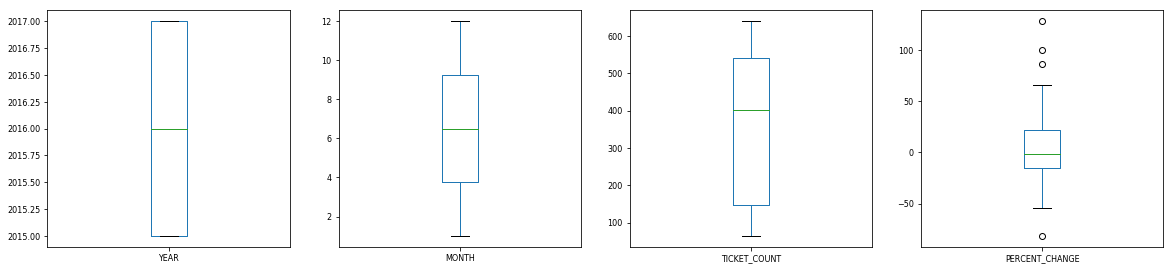

In [15]:
# box and whisker plots
df_tmp.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8,figsize=(20, 20),)
plt.show()

In [25]:
# Calculating Q3 for Ticket Count
df_tmp_q3 = df_tmp.groupby(filterAttr + ['YEAR'])['TICKET_COUNT'].quantile(0.75).reset_index(name='Q3')
#print df_tmp_q3

df_tmp_q1 = df_tmp.groupby(filterAttr + ['YEAR'])['TICKET_COUNT'].quantile(0.25).reset_index(name='Q1')
#print df_tmp_q1


In [70]:
## converting to int from float
df_tmp_q3['Q3'] = df_tmp_q3['Q3'].astype('int') 
df_tmp_q1['Q1'] = df_tmp_q1['Q1'].astype('int') 

df_tmp_rtnQ3 = pd.merge(df_tmp, df_tmp_q3, on=filterAttr + ["YEAR"], how="left")

df_tmp_rtnQ1= pd.merge(df_tmp_rtnQ3,df_tmp_q1, on=filterAttr + ["YEAR"], how="left")

# Outlier By Q3 Calculation ==[Ticket Count greater than Q3]==
df_tmp_rtnQ1['Q3_Anomaly'] = df_tmp_rtnQ1.apply(lambda x: "Yes" if x['TICKET_COUNT'] > x['Q3'] else "No", axis=1)

'''
# Outlier By IQR Calculation ==[1.5(IQR)>Q3 or 1.5(IQR)<Q1]==
df_tmp_rtnQ1['IQR'] = df_tmp_rtnQ1['Q3']-df_tmp_rtnQ1['Q1']
df_tmp_rtnQ1['1.5_IQR'] =df_tmp_rtnQ1['Q3'] * 1.5

# Upper and Lower Outliers
df_tmp_rtnQ1['IQR_Q3_Anomaly'] = df_tmp_rtnQ1.apply(lambda x: "Yes" if x['1.5_IQR'] > x['Q3'] else "No", axis=1)
df_tmp_rtnQ1['IQR_Q1_Anomaly'] = df_tmp_rtnQ1.apply(lambda x: "Yes" if x['1.5_IQR'] < x['Q1'] else "No", axis=1)
'''
df_tmp_rtn =df_tmp_rtnQ1.copy()


2015


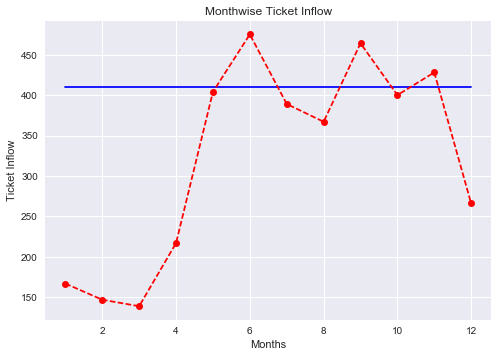

2016


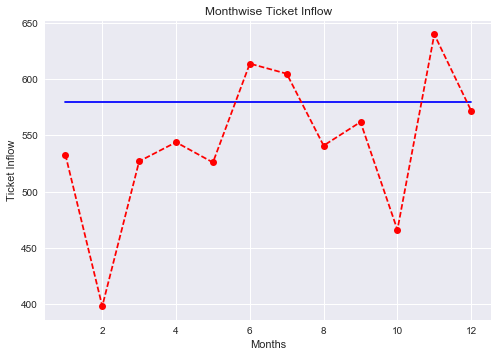

2017


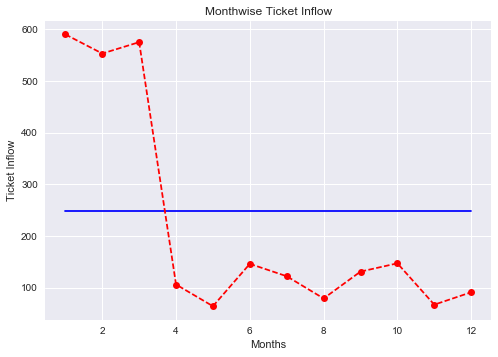

In [71]:

for yr in df_tmp_rtn.YEAR.unique():
    df_yearly =df_tmp_rtn[df_tmp_rtn['YEAR']==yr]
    sns.set()
    plt.title('Monthwise Ticket Inflow')
    plt.xlabel('Months')
    plt.ylabel('Ticket Inflow')
    print yr
    plt.plot(df_yearly['MONTH'], df_yearly['Q3'] ,marker='_', color='b', label='Square')
    plt.plot(df_yearly['MONTH'], df_yearly['TICKET_COUNT'],marker='o', linestyle='--', color='r', label='Circle')
    plt.show()

In [79]:
# Final Data Frame Having Outliers also know as 'Q3_Anomaly'
HTML((df_tmp_rtn[df_tmp_rtn['Q3_Anomaly']== 'Yes'].reset_index()).to_html())

,index,YEAR,MONTH,MONTH_NAME,TICKET_COUNT,PERCENT_CHANGE,CHANGE_STATUS,Q3,Q1,Q3_Anomaly
0,5,2015,6,Jun,475,17.574257,UP,410,204,Yes
1,8,2015,9,Sep,464,26.430518,UP,410,204,Yes
2,10,2015,11,Nov,428,7.000000,UP,410,204,Yes
3,17,2016,6,Jun,614,16.730038,UP,580,526,Yes
4,18,2016,7,Jul,605,-1.465798,DOWN,580,526,Yes
5,22,2016,11,Nov,640,37.339056,UP,580,526,Yes
6,24,2017,1,Jan,590,3.146853,UP,248,88,Yes
7,25,2017,2,Feb,553,-6.271186,DOWN,248,88,Yes
8,26,2017,3,Mar,575,3.978300,UP,248,88,Yes
